In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [18]:
def get_lower_and_upper_bounds(df, multiplier=1.5): 
    for columns in df:
        
        columnSeriesObj = df[columns]
        # start with an inner fence calculation
        multiplier = 1.5
        # calculate our q1 and q3
        q1 = df[columns].quantile(0.25)
        q3 = df[columns].quantile(0.75)
        iqr = q3 - q1
        
        inner_lower_fence = q1 - (multiplier * iqr)
        inner_upper_fence = q3 + (multiplier * iqr)
        
        

        df[f'{columns}_outliers'] = df[(df[{columns}] < inner_lower_fence) |  (df[[{columns}]] > inner_upper_fence)]

        
        print(f"iqr and lower and upper fences for {columns}")
        
        return iqr, inner_lower_fence, inner_upper_fence

        
    
    

In [3]:
def get_lemonade():
    '''
    This reads in csv of lemonade from github, writes data to
    a csv if a local file does not exist, and returns a df.
    '''
    if os.path.isfile('lemonade.csv'):
        
        # read in data from csv file if one exists
        df = pd.read_csv('lemonade.csv', index_col=0)
        
    else:
        
        # Read data from db into a DataFrame
        df = pd.read_csv('https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv')
        
        # Cache to .csv
        df.to_csv('lemonade.csv')
        
    return df


In [4]:
df = get_lemonade()

In [5]:
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         365 non-null    object 
 1   Day          365 non-null    object 
 2   Temperature  365 non-null    float64
 3   Rainfall     365 non-null    float64
 4   Flyers       365 non-null    int64  
 5   Price        365 non-null    float64
 6   Sales        365 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 22.8+ KB


In [7]:
df = df.drop(columns=['Date', 'Day'])

In [8]:
df.head()

,Temperature,Rainfall,Flyers,Price,Sales
0,27.0,2.00,15,0.5,10
1,28.9,1.33,15,0.5,13
2,34.5,1.33,27,0.5,15
3,44.1,1.05,28,0.5,17
4,42.4,1.00,33,0.5,18


## 1. Using lemonade.csv dataset and focusing on continuous variables:

### A. Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense? Which outliers should be kept?

In [22]:
# start with an inner fence calculation
multiplier = 1.5
# calculate our q1 and q3
q1 = df.Temperature.quantile(0.25)
q3 = df.Temperature.quantile(0.75)
iqr = q3 - q1



inner_lower_fence = q1 - (multiplier * iqr)
inner_upper_fence = q3 + (multiplier * iqr)

df[(df['Temperature'] < inner_lower_fence) |  (df['Temperature'] > inner_upper_fence)]

,Temperature,Rainfall,Flyers,Price,Sales
41,212.0,0.91,35,0.5,21
364,15.1,2.50,9,0.5,7


In [23]:
# start with an inner fence calculation
multiplier = 1.5
# calculate our q1 and q3
q1 = df.Rainfall.quantile(0.25)
q3 = df.Rainfall.quantile(0.75)
iqr = q3 - q1



inner_lower_fence = q1 - (multiplier * iqr)
inner_upper_fence = q3 + (multiplier * iqr)

df[(df['Rainfall'] < inner_lower_fence) |  (df['Rainfall'] > inner_upper_fence)]

,Temperature,Rainfall,Flyers,Price,Sales
0,27.0,2.00,15,0.5,10
1,28.9,1.33,15,0.5,13
2,34.5,1.33,27,0.5,15
5,25.3,1.54,23,0.5,11
6,32.9,1.54,19,0.5,13
10,32.6,1.54,23,0.5,12
11,38.2,1.33,16,0.5,14
12,37.5,1.33,19,0.5,15
15,30.6,1.67,24,0.5,12
16,32.2,1.43,26,0.5,14


In [24]:
# start with an inner fence calculation
multiplier = 1.5
# calculate our q1 and q3
q1 = df.Flyers.quantile(0.25)
q3 = df.Flyers.quantile(0.75)
iqr = q3 - q1



inner_lower_fence = q1 - (multiplier * iqr)
inner_upper_fence = q3 + (multiplier * iqr)

df[(df['Flyers'] < inner_lower_fence) |  (df['Flyers'] > inner_upper_fence)]

,Temperature,Rainfall,Flyers,Price,Sales
166,99.3,0.47,77,0.5,41
194,92.0,0.50,80,0.5,40
324,47.0,0.95,-38,0.5,20


In [25]:
# start with an inner fence calculation
multiplier = 1.5
# calculate our q1 and q3
q1 = df.Price.quantile(0.25)
q3 = df.Price.quantile(0.75)
iqr = q3 - q1



inner_lower_fence = q1 - (multiplier * iqr)
inner_upper_fence = q3 + (multiplier * iqr)

df[(df['Price'] < inner_lower_fence) |  (df['Price'] > inner_upper_fence)]

,Temperature,Rainfall,Flyers,Price,Sales


In [26]:
# start with an inner fence calculation
multiplier = 1.5
# calculate our q1 and q3
q1 = df.Sales.quantile(0.25)
q3 = df.Sales.quantile(0.75)
iqr = q3 - q1



inner_lower_fence = q1 - (multiplier * iqr)
inner_upper_fence = q3 + (multiplier * iqr)

df[(df['Sales'] < inner_lower_fence) |  (df['Sales'] > inner_upper_fence)]

,Temperature,Rainfall,Flyers,Price,Sales
181,102.9,0.47,59,0.5,143
182,93.4,0.51,68,0.5,158
183,81.5,0.54,68,0.5,235
184,84.2,0.59,49,0.5,534


##### The values make sense for everything but rainfall (too many values) and price (0 values)

### B. Use the IQR Range Rule and the upper bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these upper outliers make sense? Which outliers should be kept?

In [28]:
# start with an inner fence calculation
multiplier = 1.5
# calculate our q1 and q3
q1 = df.Temperature.quantile(0.25)
q3 = df.Temperature.quantile(0.75)
iqr = q3 - q1



inner_lower_fence = q1 - (multiplier * iqr)
inner_upper_fence = q3 + (multiplier * iqr)

df[(df['Temperature'] > inner_upper_fence)]

,Temperature,Rainfall,Flyers,Price,Sales
41,212.0,0.91,35,0.5,21


In [29]:
# start with an inner fence calculation
multiplier = 1.5
# calculate our q1 and q3
q1 = df.Rainfall.quantile(0.25)
q3 = df.Rainfall.quantile(0.75)
iqr = q3 - q1



inner_lower_fence = q1 - (multiplier * iqr)
inner_upper_fence = q3 + (multiplier * iqr)

df[(df['Rainfall'] > inner_upper_fence)]

,Temperature,Rainfall,Flyers,Price,Sales
0,27.0,2.00,15,0.5,10
1,28.9,1.33,15,0.5,13
2,34.5,1.33,27,0.5,15
5,25.3,1.54,23,0.5,11
6,32.9,1.54,19,0.5,13
10,32.6,1.54,23,0.5,12
11,38.2,1.33,16,0.5,14
12,37.5,1.33,19,0.5,15
15,30.6,1.67,24,0.5,12
16,32.2,1.43,26,0.5,14


In [30]:
# start with an inner fence calculation
multiplier = 1.5
# calculate our q1 and q3
q1 = df.Flyers.quantile(0.25)
q3 = df.Flyers.quantile(0.75)
iqr = q3 - q1



inner_lower_fence = q1 - (multiplier * iqr)
inner_upper_fence = q3 + (multiplier * iqr)

df[(df['Flyers'] > inner_upper_fence)]

,Temperature,Rainfall,Flyers,Price,Sales
166,99.3,0.47,77,0.5,41
194,92.0,0.50,80,0.5,40


In [31]:
# start with an inner fence calculation
multiplier = 1.5
# calculate our q1 and q3
q1 = df.Price.quantile(0.25)
q3 = df.Price.quantile(0.75)
iqr = q3 - q1



inner_lower_fence = q1 - (multiplier * iqr)
inner_upper_fence = q3 + (multiplier * iqr)

df[(df['Price'] > inner_upper_fence)]

,Temperature,Rainfall,Flyers,Price,Sales


In [32]:
# start with an inner fence calculation
multiplier = 1.5
# calculate our q1 and q3
q1 = df.Sales.quantile(0.25)
q3 = df.Sales.quantile(0.75)
iqr = q3 - q1



inner_lower_fence = q1 - (multiplier * iqr)
inner_upper_fence = q3 + (multiplier * iqr)

df[(df['Sales'] > inner_upper_fence)]

,Temperature,Rainfall,Flyers,Price,Sales
181,102.9,0.47,59,0.5,143
182,93.4,0.51,68,0.5,158
183,81.5,0.54,68,0.5,235
184,84.2,0.59,49,0.5,534


##### again, all but price and rainfall

### C. Using the multiplier of 3, IQR Range Rule, and the lower bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense? Which outliers should be kept?

In [33]:
# start with an inner fence calculation
multiplier = 3
# calculate our q1 and q3
q1 = df.Temperature.quantile(0.25)
q3 = df.Temperature.quantile(0.75)
iqr = q3 - q1



inner_lower_fence = q1 - (multiplier * iqr)
inner_upper_fence = q3 + (multiplier * iqr)

df[(df['Temperature'] < inner_lower_fence)]

,Temperature,Rainfall,Flyers,Price,Sales


In [34]:
# start with an inner fence calculation
multiplier = 3
# calculate our q1 and q3
q1 = df.Rainfall.quantile(0.25)
q3 = df.Rainfall.quantile(0.75)
iqr = q3 - q1



inner_lower_fence = q1 - (multiplier * iqr)
inner_upper_fence = q3 + (multiplier * iqr)

df[(df['Rainfall'] < inner_lower_fence)]

,Temperature,Rainfall,Flyers,Price,Sales


In [35]:
# start with an inner fence calculation
multiplier = 3
# calculate our q1 and q3
q1 = df.Flyers.quantile(0.25)
q3 = df.Flyers.quantile(0.75)
iqr = q3 - q1



inner_lower_fence = q1 - (multiplier * iqr)
inner_upper_fence = q3 + (multiplier * iqr)

df[(df['Flyers'] < inner_lower_fence)]

,Temperature,Rainfall,Flyers,Price,Sales
324,47.0,0.95,-38,0.5,20


In [36]:
# start with an inner fence calculation
multiplier = 3
# calculate our q1 and q3
q1 = df.Price.quantile(0.25)
q3 = df.Price.quantile(0.75)
iqr = q3 - q1



inner_lower_fence = q1 - (multiplier * iqr)
inner_upper_fence = q3 + (multiplier * iqr)

df[(df['Price'] < inner_lower_fence)]

,Temperature,Rainfall,Flyers,Price,Sales


In [37]:
# start with an inner fence calculation
multiplier = 3
# calculate our q1 and q3
q1 = df.Sales.quantile(0.25)
q3 = df.Sales.quantile(0.75)
iqr = q3 - q1



inner_lower_fence = q1 - (multiplier * iqr)
inner_upper_fence = q3 + (multiplier * iqr)

df[(df['Sales'] < inner_lower_fence)]

,Temperature,Rainfall,Flyers,Price,Sales


##### only Flyers has any outliers

### D. Using the multiplier of 3, IQR Range Rule, and the upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?

In [38]:
# start with an inner fence calculation
multiplier = 3
# calculate our q1 and q3
q1 = df.Temperature.quantile(0.25)
q3 = df.Temperature.quantile(0.75)
iqr = q3 - q1



inner_lower_fence = q1 - (multiplier * iqr)
inner_upper_fence = q3 + (multiplier * iqr)

df[(df['Temperature'] > inner_upper_fence)]

,Temperature,Rainfall,Flyers,Price,Sales
41,212.0,0.91,35,0.5,21


In [39]:
# start with an inner fence calculation
multiplier = 3
# calculate our q1 and q3
q1 = df.Rainfall.quantile(0.25)
q3 = df.Rainfall.quantile(0.75)
iqr = q3 - q1



inner_lower_fence = q1 - (multiplier * iqr)
inner_upper_fence = q3 + (multiplier * iqr)

df[(df['Rainfall'] > inner_upper_fence)]

,Temperature,Rainfall,Flyers,Price,Sales
0,27.0,2.00,15,0.5,10
338,22.0,1.82,11,0.5,10
343,31.3,1.82,15,0.5,11
364,15.1,2.50,9,0.5,7


In [40]:
# start with an inner fence calculation
multiplier = 3
# calculate our q1 and q3
q1 = df.Flyers.quantile(0.25)
q3 = df.Flyers.quantile(0.75)
iqr = q3 - q1



inner_lower_fence = q1 - (multiplier * iqr)
inner_upper_fence = q3 + (multiplier * iqr)

df[(df['Flyers'] > inner_upper_fence)]

,Temperature,Rainfall,Flyers,Price,Sales


In [41]:
# start with an inner fence calculation
multiplier = 3
# calculate our q1 and q3
q1 = df.Price.quantile(0.25)
q3 = df.Price.quantile(0.75)
iqr = q3 - q1



inner_lower_fence = q1 - (multiplier * iqr)
inner_upper_fence = q3 + (multiplier * iqr)

df[(df['Price'] > inner_upper_fence)]

,Temperature,Rainfall,Flyers,Price,Sales


In [42]:
# start with an inner fence calculation
multiplier = 3
# calculate our q1 and q3
q1 = df.Sales.quantile(0.25)
q3 = df.Sales.quantile(0.75)
iqr = q3 - q1



inner_lower_fence = q1 - (multiplier * iqr)
inner_upper_fence = q3 + (multiplier * iqr)

df[(df['Sales'] > inner_upper_fence)]

,Temperature,Rainfall,Flyers,Price,Sales
181,102.9,0.47,59,0.5,143
182,93.4,0.51,68,0.5,158
183,81.5,0.54,68,0.5,235
184,84.2,0.59,49,0.5,534


In [ ]:
##### Flyers and Price contain no values, so this makes no sense

## 2. Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:

array([[<Axes: title={'center': 'Temperature'}>,
        <Axes: title={'center': 'Rainfall'}>],
       [<Axes: title={'center': 'Flyers'}>,
        <Axes: title={'center': 'Price'}>],
       [<Axes: title={'center': 'Sales'}>, <Axes: >]], dtype=object)

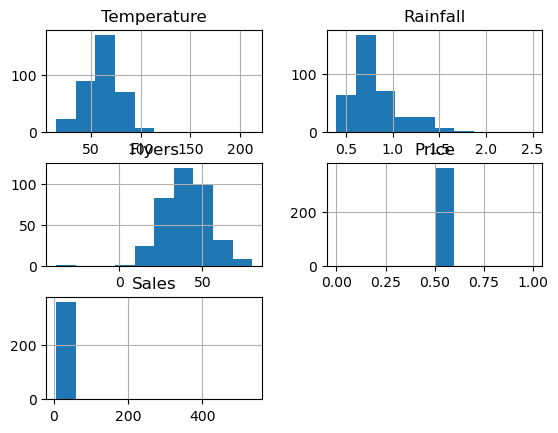

In [43]:
df.hist()

In [ ]:
##### looks like only Temp, Rainfall, and Sales are normally distributed

### A. Use a 2 sigma decision rule to isolate the outliers. Do these make sense? Should certain outliers be kept or removed?

In [44]:
# start with an inner fence calculation
multiplier = 2
# calculate our q1 and q3
q1 = df.Temperature.quantile(0.25)
q3 = df.Temperature.quantile(0.75)
iqr = q3 - q1



inner_lower_fence = q1 - (multiplier * iqr)
inner_upper_fence = q3 + (multiplier * iqr)

df[(df['Temperature'] < inner_lower_fence) |  (df['Temperature'] > inner_upper_fence)]

,Temperature,Rainfall,Flyers,Price,Sales
41,212.0,0.91,35,0.5,21


In [45]:
# start with an inner fence calculation
multiplier = 2
# calculate our q1 and q3
q1 = df.Rainfall.quantile(0.25)
q3 = df.Rainfall.quantile(0.75)
iqr = q3 - q1



inner_lower_fence = q1 - (multiplier * iqr)
inner_upper_fence = q3 + (multiplier * iqr)

df[(df['Rainfall'] < inner_lower_fence) |  (df['Rainfall'] > inner_upper_fence)]

,Temperature,Rainfall,Flyers,Price,Sales
0,27.0,2.00,15,0.5,10
5,25.3,1.54,23,0.5,11
6,32.9,1.54,19,0.5,13
10,32.6,1.54,23,0.5,12
15,30.6,1.67,24,0.5,12
23,28.6,1.54,20,0.5,12
337,34.9,1.54,16,0.5,13
338,22.0,1.82,11,0.5,10
343,31.3,1.82,15,0.5,11
347,31.9,1.54,24,0.5,13


In [46]:
# start with an inner fence calculation
multiplier = 2
# calculate our q1 and q3
q1 = df.Sales.quantile(0.25)
q3 = df.Sales.quantile(0.75)
iqr = q3 - q1



inner_lower_fence = q1 - (multiplier * iqr)
inner_upper_fence = q3 + (multiplier * iqr)

df[(df['Sales'] < inner_lower_fence) |  (df['Sales'] > inner_upper_fence)]

,Temperature,Rainfall,Flyers,Price,Sales
181,102.9,0.47,59,0.5,143
182,93.4,0.51,68,0.5,158
183,81.5,0.54,68,0.5,235
184,84.2,0.59,49,0.5,534


In [ ]:
##### Rainfall does not makes sense, too many outliers

## 3. Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv

In [47]:
# start with an inner fence calculation
multiplier = 3
# calculate our q1 and q3
q1 = df.Temperature.quantile(0.25)
q3 = df.Temperature.quantile(0.75)
iqr = q3 - q1



inner_lower_fence = q1 - (multiplier * iqr)
inner_upper_fence = q3 + (multiplier * iqr)

df[(df['Temperature'] < inner_lower_fence) |  (df['Temperature'] > inner_upper_fence)]

,Temperature,Rainfall,Flyers,Price,Sales
41,212.0,0.91,35,0.5,21


In [48]:
# start with an inner fence calculation
multiplier = 3
# calculate our q1 and q3
q1 = df.Rainfall.quantile(0.25)
q3 = df.Rainfall.quantile(0.75)
iqr = q3 - q1



inner_lower_fence = q1 - (multiplier * iqr)
inner_upper_fence = q3 + (multiplier * iqr)

df[(df['Rainfall'] < inner_lower_fence) |  (df['Rainfall'] > inner_upper_fence)]

,Temperature,Rainfall,Flyers,Price,Sales
0,27.0,2.00,15,0.5,10
338,22.0,1.82,11,0.5,10
343,31.3,1.82,15,0.5,11
364,15.1,2.50,9,0.5,7


In [49]:
# start with an inner fence calculation
multiplier = 3
# calculate our q1 and q3
q1 = df.Sales.quantile(0.25)
q3 = df.Sales.quantile(0.75)
iqr = q3 - q1



inner_lower_fence = q1 - (multiplier * iqr)
inner_upper_fence = q3 + (multiplier * iqr)

df[(df['Sales'] < inner_lower_fence) |  (df['Sales'] > inner_upper_fence)]

,Temperature,Rainfall,Flyers,Price,Sales
181,102.9,0.47,59,0.5,143
182,93.4,0.51,68,0.5,158
183,81.5,0.54,68,0.5,235
184,84.2,0.59,49,0.5,534


In [ ]:
##### these all seem to make more sense as outliers, not too many or too few